# <span style="color:red"> Targeted-from-mzTab notebook for IODA </span>

**Purpose**: The IODA targeted-from-mzTab workflow takes allows to generate list of target ions for iterative optimise data acquisition (IODA) of fragmentation spectra in LC-MS. It accepts as input an mzTab file with results for two samples: the "reference" sample and the "blank" sample. The targets are detected in the "reference" sample, and background ions are detected in the "blank" sample. Background ions are excluded from the targets. The targets can be acquired by IODA in one or multiple experiments for higher coverage.


**Usage**: This notebook requires the user to provide an mzTab. If you need to process your LC-MS data, you can use our [IODA targeted-from-mzML notebook](IODA_targeted_from_mzML.ipynb), or refer to our documentation for more informations. The IODA targeted workflow defines the target ions, and these targets are then formatted for XCalibur or [MaxQuant.Live](http://www.maxquant.live/).

**Documentation**: Please refer to the documentation page [See here](link).

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Generate an mzTab file

The mzTab file must contain results from feature detection and alignment for the two samples: the "reference" sample and the "blank' sample. Please refer to the [documentation page](link) for more information.

### Step 1 - Upload the mzTab file

##### <span style="color:brown">Method 1 - Upload your mzTab file </span>

Upload your mzML files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for the file.


### Step 3 - Specify the link or path to the mzTab file

In the cell below, indicate the filename for the mzTab file. The filename must be into parenthesis,  such as:\
*input_mzTab = "myfile.mzTab"* or *input_mzTab = "input_folder/myfile.mzTab"*

*This test files could be used*:\
*input_mzTab = "tests/Euphorbia/Targeted/toppas_output/Targeted_MZtab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab"*

<!--This is an other test jobs 
input_mzTab = 'https://drive.google.com/file/d/1NGVzhrw-xZ4nMJserIQ7v4tYgcmraZ6g/view?usp=sharing'
-->

In [ ]:
input_mzTab = "myfile.mzTab" 

### Step 4 - Specify the parameters of the IODA-targeted workflow
**Specify the parameter values for IODA-targeted workflow in the cell below:**

*min_ratio_value*: minimum ratio for the intensity of an ion/feature (peak height) between the reference and blank samples (reference/blank). Only ions above that ratio will be valid ion targets. Default = 3.

*min_intensity_value*: the minimum intensity (peak height) of an ion/feature in the reference sample to be considered as valid ion targets. Default = 1E5.

*pretarget_rt_margin*: Retention time margin before the target ion apex (in seconds). Default = 0.5.

*posttarget_rt_margin*: Retention time margin after the target ion apex (in seconds). It is often more than the *'pretarget_rt_margin'* due to the now gaussian nature of LC-MS peaks. Note that this value could be increased to reach the dynamic exclusion time parameter of the acquisition method. Default = 5.

*experiment_number*: define the number of iterative experiment(s) to perform for the IODA-targeted workflow. If >2, the valid target ions will be splitted into (multiple) experiments Default = 3, range 1-10.


In [ ]:
min_ratio_value = 5
min_intensity_value = 1E5
pretarget_rt_margin = 0.5
posttarget_rt_margin = 5
experiment_number = 3

### Step 5 - Run the IODA-targeted workflow

Simply run the cell below to start the IODA-targeted workflow

In [ ]:
from IODA_targeted_workflow import *
make_targeted_list_from_mzTab(input_mzTab, experiment_number, min_ratio_value, min_intensity_value,\
                              pretarget_rt_margin,posttarget_rt_margin,30)

### Step 6 - Examine the results

**Examinate the log above**: Evaluate if the parameters are adapted to your sample(s) complexity and experimental set-up. In particular:
   > - Evaluate the parameters for the target ions selection methods (shotgun, intensity and ratio): look for how many ions were filtered out. If needed adjust the parameter value(s) for *'min_ratio_value'*, *'min_intensity_value'*.
   > - Limit the maximum number of target ions for a single experiment to 1000-2000 to your experimental conditions and sample complexity. This is multi-factorial (chromatographic method, performance of MS instrument, MS method, and sample complexity). You can filter out target ions with by increasing the parameters *'min_ratio_value'*, *'min_intensity_value'*. Or you can modulate the number iterative experiments with the parameters: *'experiment_number'*.
    > NB: at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid target ions in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. 

In [ ]:
from IPython.display import Image
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_RATIO_scatter_view.png")

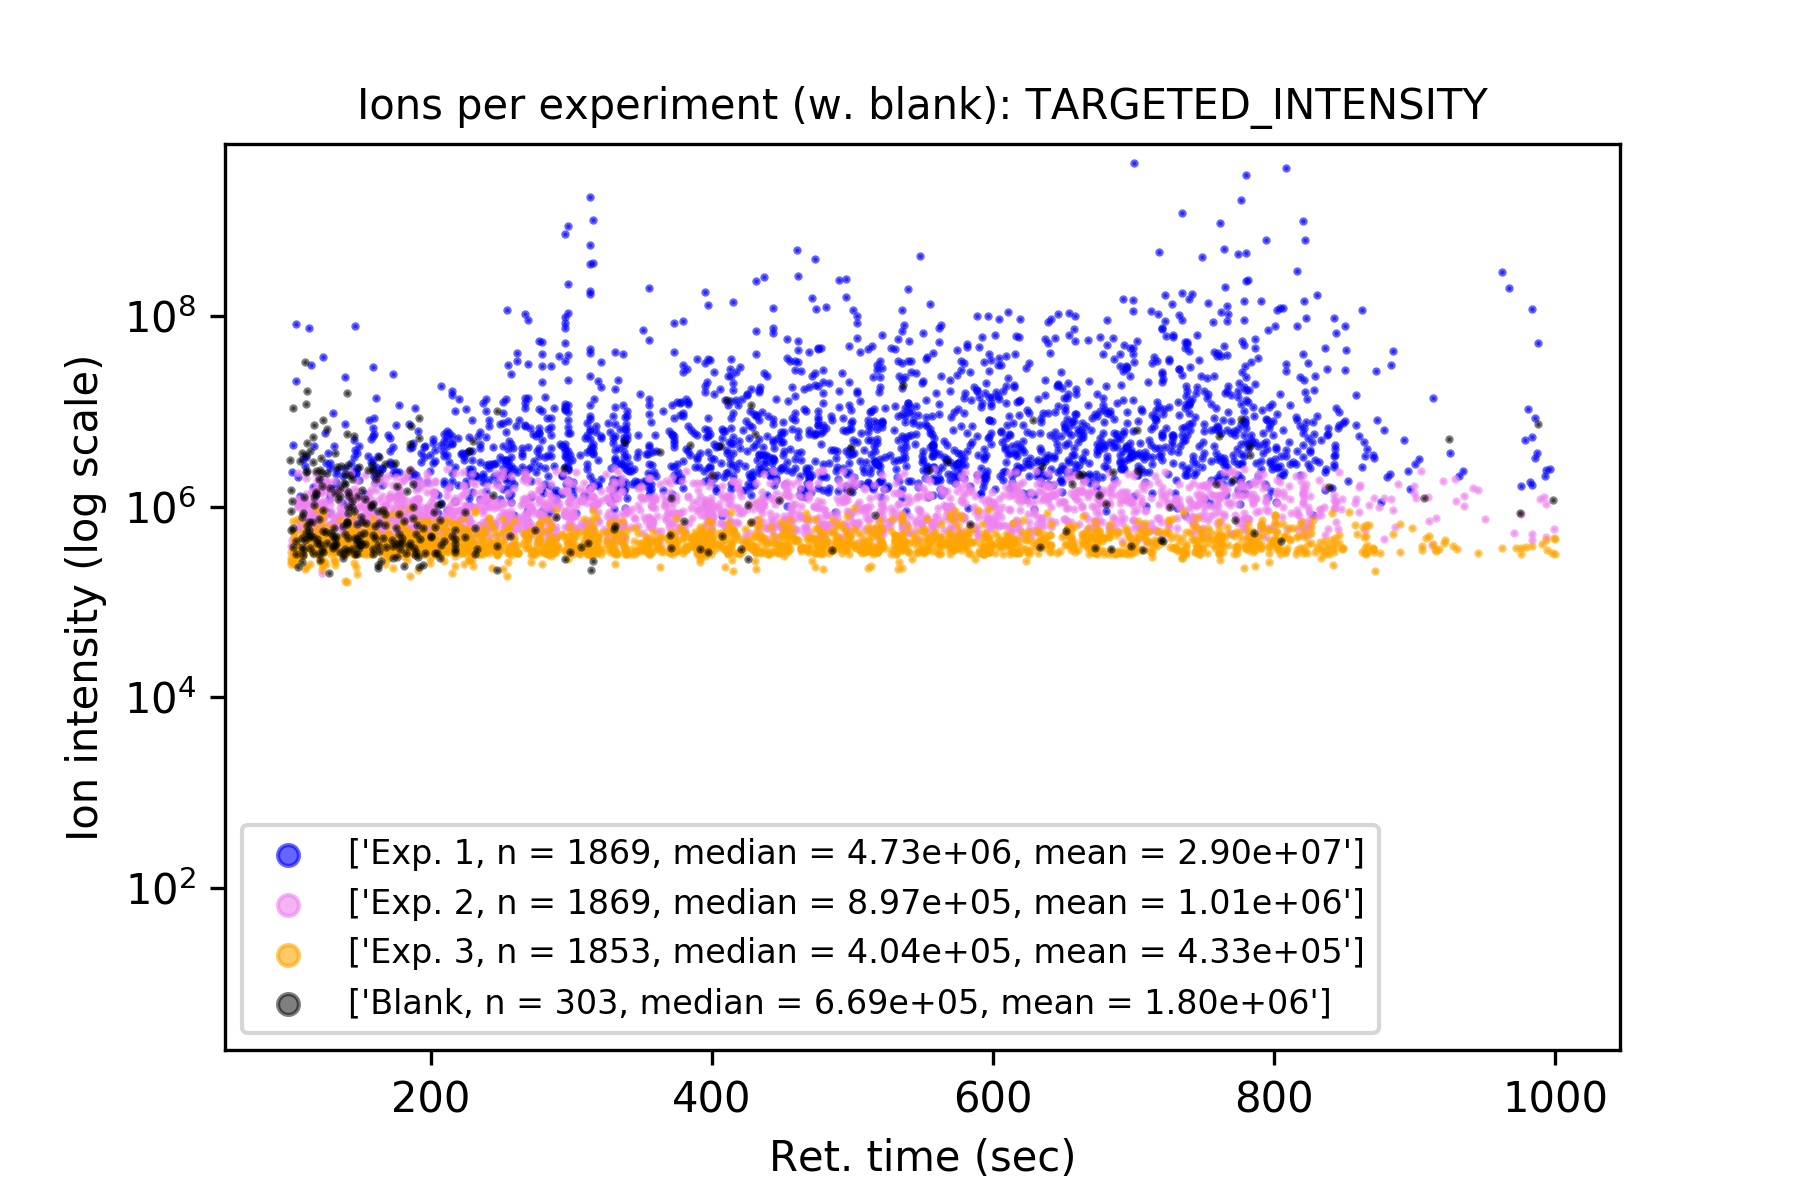

In [13]:
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_INTENSITY_scatter_view.png")

### Step 7 - Download the results

Download the IODA-targeted workflow results ->
[download-results/IODA_targeted_results.zip](download-results/IODA_targeted_results.zip?download=1).

### Step 8 - Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).